In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the ratings data

In [3]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

In [4]:
ratings = pd.read_csv('D:/challenge/ml-1m/ratings.dat',sep="::",  names=r_cols, engine='python')

In [5]:
print(ratings.head())

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [6]:
# Check the file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
None


#### Reading the movies data

In [7]:
m_cols = ['movie_id', 'title', 'genres']

In [8]:
movies = pd.read_csv('D:/challenge/ml-1m/movies.dat',sep="::",  names=m_cols, engine='python')

In [9]:
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [10]:
# Check the file info
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


#### Reading the users data

In [11]:
u_cols = ['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc']


In [12]:
users = pd.read_csv('D:/challenge/ml-1m/users.dat',sep="::",  names=u_cols, engine='python')

In [13]:
print(users.head())

   user_id gender  zipcode  age_desc occ_desc
0        1      F        1        10    48067
1        2      M       56        16    70072
2        3      M       25        15    55117
3        4      M       45         7    02460
4        5      M       25        20    55455


In [14]:
# Check the file info
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null int64
age_desc    6040 non-null int64
occ_desc    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None


### Data Exploration

#### Word-Cloud Visualization

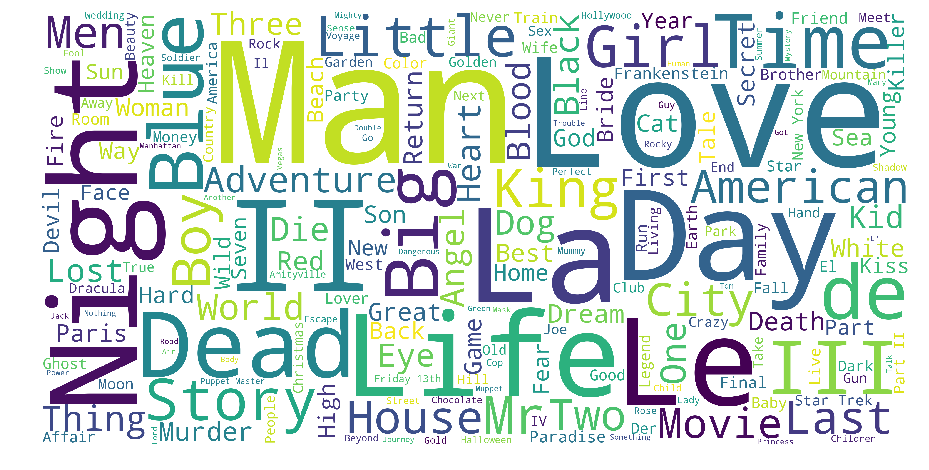

In [15]:
# Import new libraries
%matplotlib inline

import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Ratings

In [16]:
# Get summary statistics of rating
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Display Distribution of Rating

C:\Users\Irene\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


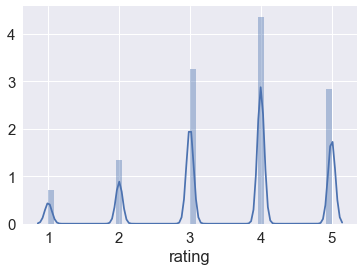

In [17]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

### Display Top 20 movies with highest ratings

In [18]:
# Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


### Check the most popular genres

####  Assumption:  Films in the same genre should have similar contents. 

In [19]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

#### The top 5 genres are Drama, Comedy, Action, Thriller, and Romance.

### Visualization the most popular genres by wordcloud

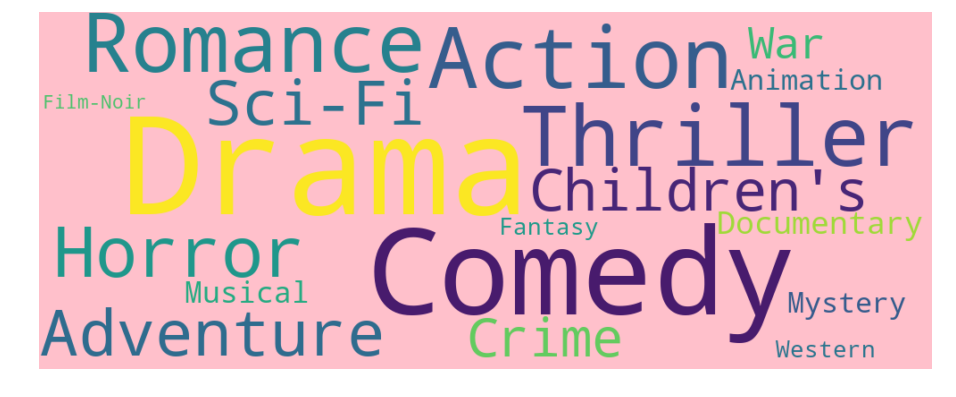

In [20]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='pink')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### The top five genres are Drama, Comedy, Action, Triller and Romance

## Content-based Recommendation Model

### Recommend movies with same genres

In [21]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

### Text mining, apply Term Frequency (TF) and Inverse Document Frequency (IDF)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

### Cosine Similarity

In [23]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [24]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

#### Validation

In [25]:
# Drama
genre_recommendations('Good Will Hunting (1997)').head(50)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [26]:
# Comedy
genre_recommendations('Rushmore (1998)').head(20)

18                 Ace Ventura: When Nature Calls (1995)
37                                   It Takes Two (1995)
51                               Mighty Aphrodite (1995)
62     Don't Be a Menace to South Central While Drink...
64                                       Bio-Dome (1996)
68                                         Friday (1995)
87                                    Black Sheep (1996)
94                         In the Bleak Midwinter (1995)
99                                  Bottle Rocket (1996)
100                                     Mr. Wrong (1996)
102                                 Happy Gilmore (1996)
107                  Headless Body in Topless Bar (1995)
113                     Happiness Is in the Field (1995)
117                       Steal Big, Steal Little (1995)
123                        Flirting With Disaster (1996)
133                                Down Periscope (1996)
139                                 Birdcage, The (1996)
142                        Brot

In [27]:
# Action 
genre_recommendations('Matrix, The (1999)').head(20)

283                Nemesis 2: Nebula (1995)
585       Terminator 2: Judgment Day (1991)
683                             Solo (1996)
738                     Arrival, The (1996)
1024              Lawnmower Man, The (1992)
1220                 Terminator, The (1984)
1533                        Face/Off (1997)
1763                   Lost in Space (1998)
2502                     Matrix, The (1999)
2531                        eXistenZ (1999)
2653                   Deep Blue Sea (1999)
3458                        Predator (1987)
3628                      Predator 2 (1990)
375                          Timecop (1994)
401     Highlander III: The Sorcerer (1994)
438                   Demolition Man (1993)
500                        No Escape (1994)
728                        Barb Wire (1996)
1362        Adrenalin: Fear the Rush (1996)
1491              Fifth Element, The (1997)
Name: title, dtype: object

In [28]:
# Triller 
genre_recommendations('Dead Ringers (1988)').head(20)

60                       Eye for an Eye (1996)
78                           Juror, The (1996)
90                          Mary Reilly (1996)
98                            City Hall (1996)
109                         Taxi Driver (1976)
215                     Babysitter, The (1995)
222                          Disclosure (1994)
226                Death and the Maiden (1994)
227                   Dolores Claiborne (1994)
277                 Murder in the First (1995)
432                      Color of Night (1994)
450                           Firm, The (1993)
477                          Kalifornia (1993)
589           Silence of the Lambs, The (1991)
610                              Loaded (1994)
622                    Last Supper, The (1995)
623                         Primal Fear (1996)
635                          Diabolique (1996)
671    Some Folks Call It a Sling Blade (1993)
821                              Ransom (1996)
Name: title, dtype: object

In [29]:
# Romance
genre_recommendations('Out of Sight (1998)').head(20)

1487     Truth or Consequences, N.M. (1997)
1843                    Out of Sight (1998)
2623       Run Lola Run (Lola rennt) (1998)
281                     New York Cop (1996)
985                       Set It Off (1996)
1727                King of New York (1990)
2191                          Wisdom (1986)
2239                    Detroit 9000 (1973)
2499                  Mod Squad, The (1999)
2547                      Dick Tracy (1990)
3196    Hard-Boiled (Lashou shentan) (1992)
3647                    Fatal Beauty (1987)
3648              Gone in 60 Seconds (2000)
3660                           Shaft (1971)
3675                           Shaft (2000)
3712                 Shaft in Africa (1973)
3713              Shaft's Big Score! (1972)
41                   Dead Presidents (1995)
489                Menace II Society (1993)
847                   Godfather, The (1972)
Name: title, dtype: object

| Pros                          |  Cons                                |
|-------------------------------|--------------------------------------|
|  No need for data on other users |Difficult to find appropriate features in movies|
|  Can recommend to new and unpopular items |Do not recommend the items which are outside the user's content, ie: new users|
|  Can provide recommendation to unique tastes of users | Unable to identify the quality judgements of other users |

# Collaborative Filtering Recommendation Model

### Pearson Similarity 

### Data Wrangling

In [30]:
# Add "NaN" in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace "NaN" in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

Pick 3% random sample of 30,000 ratings from the 1M ratings.

In [31]:
# Randomly sample 3% of the ratings dataset
small_data = ratings.sample(frac=0.03)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30006 entries, 14727 to 306957
Data columns (total 4 columns):
user_id      30006 non-null int64
movie_id     30006 non-null int64
rating       30006 non-null int64
timestamp    30006 non-null int64
dtypes: int64(4)
memory usage: 1.1 MB
None


### Use scikit-learn library to split the dataset into testing and training. Cross_validation.train_test_split shuffles and splits the data into two datasets according to the percentage of test examples, which in this case is 0.3.

In [32]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(small_data, test_size=0.3)


### Create a user-item matrix. We have splitted the data into testing (30%) and training (70%)

In [33]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
test_data_matrix = test_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(21004, 3)
(9002, 3)


### To calculate the Pearson Correlation Coefficient via pairwise distances function from sklearn. 

### User Similarity Matrix

In [34]:
from sklearn.metrics.pairwise import pairwise_distances
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Item Similarity Matrix


In [35]:
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.0143155   0.00777988]
 [-0.0143155   1.         -0.06128572]
 [ 0.00777988 -0.06128572  1.        ]]


### To validate our recommender model.

In [36]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

### To evaluate accuracy of predicted ratings is Root Mean Squared Error (RMSE), where the RMSE is the square root of  mean square error (MSE).

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [38]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE in test data: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE in test data: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE in test data: 1360.3997449620258
Item-based CF RMSE in test data: 1637.7149515047147


In [39]:
# RMSE on the train data
print('User-based CF RMSE in train data: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE in train data: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE in train data: 968.7353694506947
Item-based CF RMSE in train data: 137.77805950216484


Both User-based and Item-based CF RMSE are large, it may due to overfitted the training data.

# Model-Based Collaborative Filtering

### Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. As per my understanding, the algorithms in this approach can further be broken down into 3 sub-types:
### (i) Matrix Factorization (MF): The idea behind such models is that attitudes or preferences of a user can be determined by a small number of hidden latent factors. These factors are also called Embeddings, which represent different characteristics for users and items. Matrix factorization can be done by various methods including Singular Vector Decomposition (SVD), Probabilistic Matrix Factorization (PMF), and Non-Negative Matrix Factorization (NMF).
### (ii) Clustering based algorithm (KNN): The idea of clustering is same as that of memory-based recommendation systems. In memory-based algorithms, we use the similarities between users and/or items and use them as weights to predict a rating for a user and an item. The difference is that the similarities in this approach are calculated based on an unsupervised learning model, rather than Pearson correlation or cosine similarity.

### Model-Based Collaborative Filtering¶ 
Model-based Collaborative Filtering is based on matrix factorization (MF) which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:
The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. 
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. 
You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

### Pivot ratings

In [40]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Denormalize the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [41]:
R = Ratings.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

Setting Up SVD

In [42]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [43]:
sigma = np.diag(sigma)

Making Predictions from the Decomposed Matrices





In [44]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

With the predictions matrix for every user, I can build a function to recommend movies for any user. I return the list of movies the user has already rated, for the sake of comparison.

In [45]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [46]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )
    #print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    # print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    return user_full, recommendations

In [47]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

In [48]:
already_rated.head(20)

,user_id,movie_id,rating,timestamp,title,genres
5,1310,2248,5,974781573,Say Anything... (1989),"['Comedy', 'Drama', 'Romance']"
6,1310,2620,5,974781573,This Is My Father (1998),"['Drama', 'Romance']"
7,1310,3683,5,974781935,Blood Simple (1984),"['Drama', 'Film-Noir']"
15,1310,1704,5,974781573,Good Will Hunting (1997),['Drama']
1,1310,1293,5,974781839,Gandhi (1982),['Drama']
12,1310,3101,4,974781573,Fatal Attraction (1987),['Thriller']
11,1310,1343,4,974781534,Cape Fear (1991),['Thriller']
20,1310,2000,4,974781892,Lethal Weapon (1987),"['Action', 'Comedy', 'Crime', 'Drama']"
18,1310,3526,4,974781892,Parenthood (1989),"['Comedy', 'Drama']"
17,1310,3360,4,974781935,Hoosiers (1986),['Drama']
